In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Theta
from darts.metrics import mae
from darts.utils.missing_values import fill_missing_values
from darts.datasets import TemperatureDataset, AirPassengersDataset, EnergyDataset

import warnings

import logging


In [2]:
df= pd.read_csv('Crude Oil WTI.csv')
df = df.dropna()

In [3]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1383
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1296 non-null   datetime64[ns]
 1   Price     1296 non-null   float64       
 2   Open      1296 non-null   float64       
 3   High      1296 non-null   float64       
 4   Low       1296 non-null   float64       
 5   Vol.      1296 non-null   int64         
 6   Change %  1296 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 81.0 KB


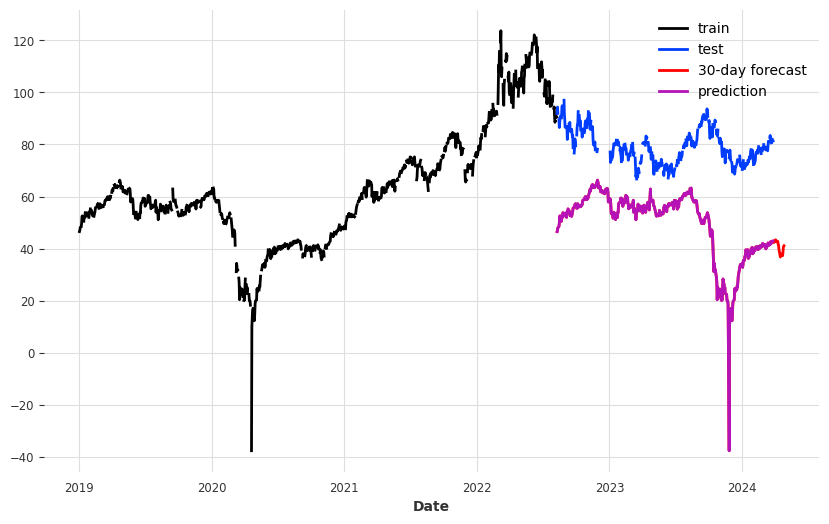

MAE: 30.32467783505156


In [5]:
df = df.fillna(0)
train_size = int(0.3 * len(df))
test_size = len(df) - train_size
train_data = df[train_size:]
test_data = df[:train_size]

train = TimeSeries.from_dataframe(train_data, time_col='Date', value_cols='Price', fill_missing_dates=True, freq='D')
test = TimeSeries.from_dataframe(test_data, time_col='Date', value_cols='Price', fill_missing_dates=True, freq='D')

model = FFT(required_matches=set(), nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(test))

# Mở rộng dự đoán cho 30 ngày tiếp theo
future_dates = pd.date_range(start=test.end_time(), periods=30, freq='D')
future_pred = model.predict(len(pred_val) + 30)
future_pred.index = future_dates

# Hiển thị dự đoán với màu đỏ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
train.plot(label="train")
test.plot(label="test")
future_pred.plot(label="30-day forecast", color='red')
pred_val.plot(label="prediction")
plt.legend()
plt.show()

# Tính toán và hiển thị sai số
print("MAE:", mae(pred_val, test))


In [10]:
df= pd.read_csv('Heating Oil.csv')
df = df.dropna()

In [11]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 0 to 1381
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1319 non-null   datetime64[ns]
 1   Price     1319 non-null   float64       
 2   Open      1319 non-null   float64       
 3   High      1319 non-null   float64       
 4   Low       1319 non-null   float64       
 5   Vol.      1319 non-null   int64         
 6   Change %  1319 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.4 KB


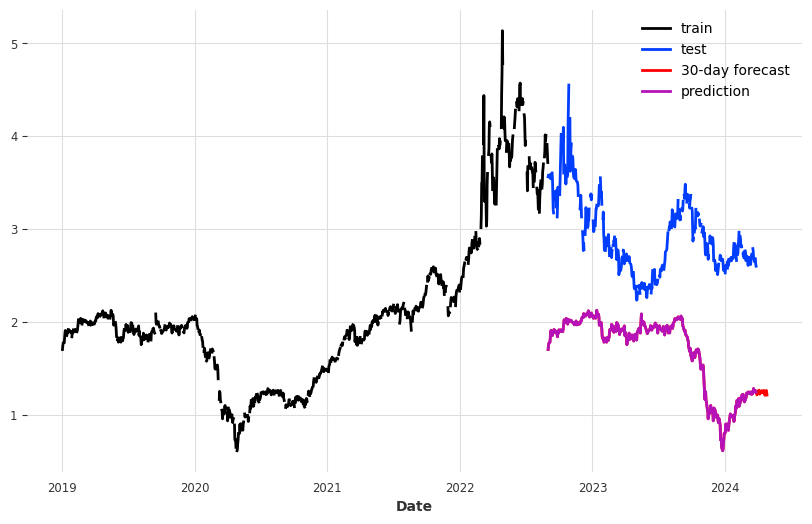

MAE: 1.239872742616034


In [13]:
df = df.fillna(0)
train_size = int(0.3 * len(df))
test_size = len(df) - train_size
train_data = df[train_size:]
test_data = df[:train_size]

train = TimeSeries.from_dataframe(train_data, time_col='Date', value_cols='Price', fill_missing_dates=True, freq='D')
test = TimeSeries.from_dataframe(test_data, time_col='Date', value_cols='Price', fill_missing_dates=True, freq='D')

model = FFT(required_matches=set(), nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(test))

# Mở rộng dự đoán cho 30 ngày tiếp theo
future_dates = pd.date_range(start=test.end_time(), periods=30, freq='D')
future_pred = model.predict(len(pred_val) + 30)
future_pred.index = future_dates

# Hiển thị dự đoán với màu đỏ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
train.plot(label="train")
test.plot(label="test")
future_pred.plot(label="30-day forecast", color='red')
pred_val.plot(label="prediction")
plt.legend()
plt.show()

# Tính toán và hiển thị sai số
print("MAE:", mae(pred_val, test))


In [14]:
df= pd.read_csv('Gasoline RBOB.csv')
df = df.dropna()

In [15]:
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return volume_str


def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%'))
    return new_change

def convert_str_to_number(str):
    return float(str.replace(',', ''))

df['Vol.'] = df['Vol.'] .apply(convert_volume_to_number)
df['Change %'] = df['Change %'].apply(convert_change_to_number)
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1330 entries, 0 to 1621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1330 non-null   datetime64[ns]
 1   Price     1330 non-null   float64       
 2   Open      1330 non-null   float64       
 3   High      1330 non-null   float64       
 4   Low       1330 non-null   float64       
 5   Vol.      1330 non-null   int64         
 6   Change %  1330 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 83.1 KB


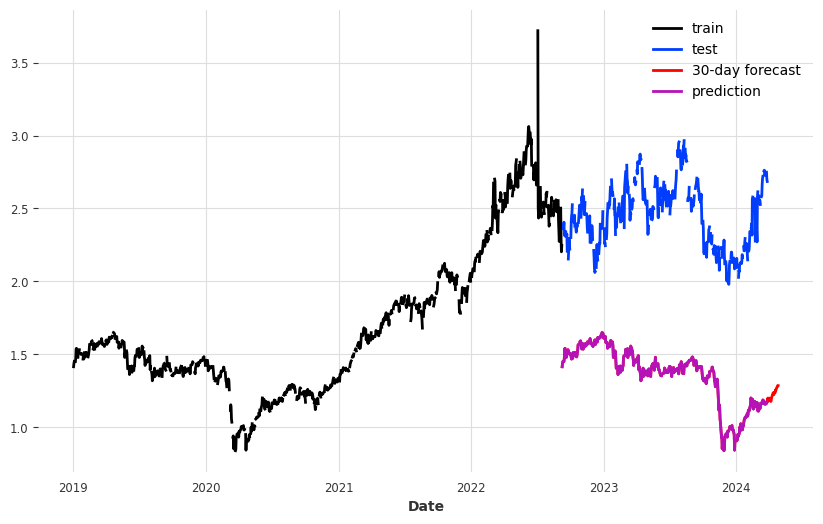

MAE: 1.0908684001670845


In [17]:
df = df.fillna(0)
train_size = int(0.3 * len(df))
test_size = len(df) - train_size
train_data = df[train_size:]
test_data = df[:train_size]

train = TimeSeries.from_dataframe(train_data, time_col='Date', value_cols='Price', fill_missing_dates=True, freq='D')
test = TimeSeries.from_dataframe(test_data, time_col='Date', value_cols='Price', fill_missing_dates=True, freq='D')

model = FFT(required_matches=set(), nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(test))

# Mở rộng dự đoán cho 30 ngày tiếp theo
future_dates = pd.date_range(start=test.end_time(), periods=30, freq='D')
future_pred = model.predict(len(pred_val) + 30)
future_pred.index = future_dates

# Hiển thị dự đoán với màu đỏ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
train.plot(label="train")
test.plot(label="test")
future_pred.plot(label="30-day forecast", color='red')
pred_val.plot(label="prediction")
plt.legend()
plt.show()

# Tính toán và hiển thị sai số
print("MAE:", mae(pred_val, test))
